In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
data_path = os.path.abspath(os.path.join('../../results/'))
if module_path not in sys.path:
    sys.path.append(module_path)
if data_path not in sys.path:
    sys.path.append(data_path)

%config InlineBackend.figure_format = 'retina'


In [2]:
from society.beliefs import Distribution, BeliefDistribution
from society.agents import AnalyticalAgent
from society.structure.network import ArtificialNetwork
from society.structure import AgentNetwork
from updates import UpdateRule,Interactions
from simulation import Simulation, Insights
from computations.insights.opinions import number_of_opinions_evaluation_uncertainty
from plotting.summaries import *
import copy


In [3]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.05)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(100, "fully_connected")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
update_rule = UpdateRule(evaluation_bias=0.3)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

In [4]:
simulation_results = []
initial_uncertainties = [0.3, 0.15, 0.1, 0.05]
for initial_uncertainty in initial_uncertainties:
    unique = Distribution(type="unique", value=initial_uncertainty)
    agent_network.set_uncertainties(unique)
    simulation.run(interactions, agent_network)
    result = copy.deepcopy(simulation.insights.belief_evolution)
    simulation_results.append(result)

Progress: 100%|██████████| 1000/1000 [00:01<00:00, 631.62it/s]


In [ ]:
plot_varying_uncertainty(simulation_results, initial_uncertainties)

In [ ]:
evaluations = np.arange(0.1, 0.9, 0.02).round(2)
uncertainties = [0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3]
heat_map = number_of_opinions_evaluation_uncertainty(evaluations, uncertainties, agent_network, simulation, interactions, repetitions=3)

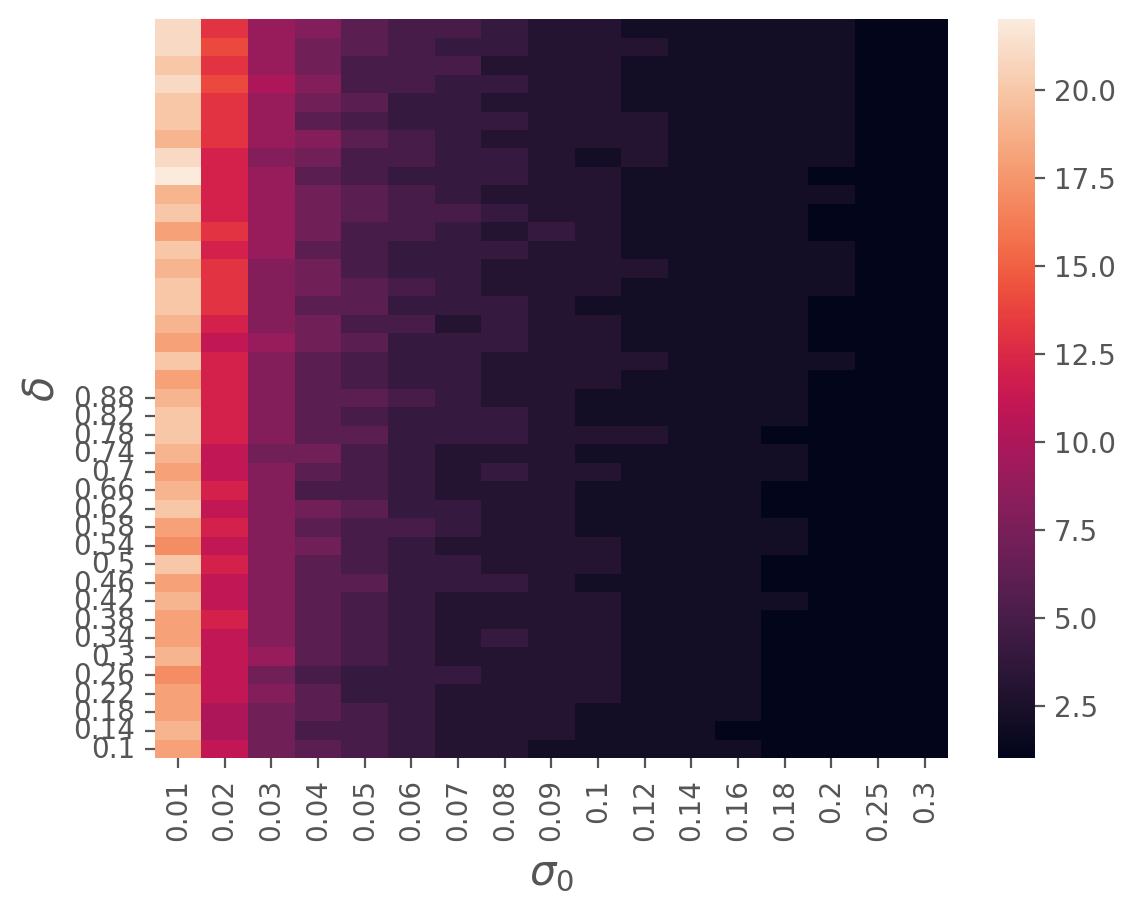

In [3]:
from utils.io import load_arrays
values = load_arrays("../../../results/data/number_ops_uncertainty_evaluation.npy")
plot_number_of_opinions_evaluation_uncertainty(values[0], values[1], values[2])